# Learn about ipyaladin

- [From you-tube video](https://www.youtube.com/watch?v=E98vouSlbU4)
- Github and documentation on ipyaladin : https://github.com/cds-astro/ipyaladin?tab=readme-ov-file
- Test aladin inside jupyter notebooks
- creation date : 2024-11-02 

In [1]:
#!pip install ipyaladin
#!pip install sidecar
#!pip install regions
#!pip install MOC

In [2]:
from ipyaladin import __version__, __aladin_lite_version__
print("version:", __version__, "running Aladin Lite:", __aladin_lite_version__)

version: 0.5.2 running Aladin Lite: 3.5.1-beta


In [3]:
from ipyaladin import Aladin
from sidecar import Sidecar

In [4]:
aladin = Aladin()
with Sidecar(title="aladin-output"):
    display(aladin)

In [5]:
aladin.target = "M31"

In [6]:
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u 

In [7]:
coor_perseus = SkyCoord.from_name("Perseus Cluster")

In [8]:
aladin.target = coor_perseus

In [9]:
coor_perseus

<SkyCoord (ICRS): (ra, dec) in deg
    (49.9482, 41.515)>

In [10]:
aladin.fov = Angle(15*u.arcmin)

In [11]:
estimated_dimension = aladin.fov

In [12]:
estimated_dimension

<Angle 0.25 deg>

In [13]:
from regions import  CircleSkyRegion

In [14]:
aladin.add_graphic_overlay_from_region(CircleSkyRegion(coor_perseus,estimated_dimension),color="salmon",line_dash=[5],name="cluster_dimension")

In [15]:
from mocpy import MOC

In [16]:
gaia_galcan_coverage = MOC.from_vizier_table("I/356/galcand")

In [17]:
aladin.add_moc(gaia_galcan_coverage,color="seagreen",name="gaia_galcan")

In [18]:
from astroquery.mocserver import MOCServer

In [19]:
euclide = MOCServer.find_datasets(meta_data = "*Euclid*")

In [20]:
euclide["ID"]

CDS/P/Euclid/ERO/FirstImages
CDS/P/Euclid/ERO/NISP.H
CDS/P/Euclid/ERO/NISP.J
CDS/P/Euclid/ERO/NISP.Y
CDS/P/Euclid/ERO/VIS
CDS/P/Euclid/ERO/color


In [21]:
#euclide

In [24]:
aladin.survey = "CDS/P/Euclid/ERO/VIS"

In [25]:
euclide_cutout = aladin.get_view_as_fits()[0]

In [26]:
import matplotlib.pyplot as plt
import numpy as np

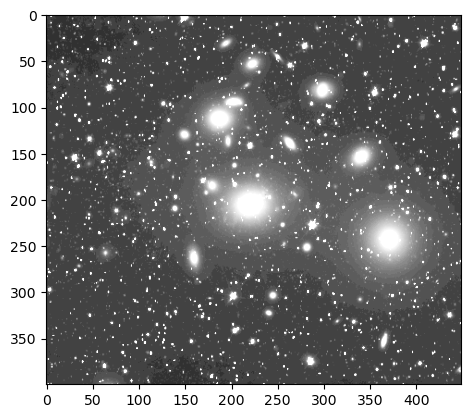

In [27]:
plt.imshow(np.flipud(euclide_cutout.data.astype('short')),cmap="Greys_r",norm="asinh",vmin=10,vmax=50)

In [28]:
from astroquery.vizier import Vizier

In [29]:
catalog = Vizier(catalog = "I/356/galcand",row_limit = -1)

In [30]:
extra_galactic = catalog.query_region(coor_perseus,radius=estimated_dimension)[0]

In [31]:
extra_galactic

Source,SolID,Class,PGal,PQSO,z,RA_ICRS,DE_ICRS,_RA.icrs,_DE.icrs
,,,,,,deg,deg,deg,deg
int64,int64,str15,float64,float64,float64,float64,float64,float64,float64
239401309576981248,1636148068921376768,,1,0,--,49.94493455864,41.27038065247,49.94493455864,41.27038065247
239401515737357696,1636148068921376768,,1,3.616461e-14,0.0668034,49.93560822275,41.27807383988,49.93560822275,41.27807383988
239401721896535552,1636148068921376768,,1,6.73415e-15,0.0707636,49.97071535744,41.30236864072,49.97071535744,41.30236864072
239401721896567936,1636148068921376768,GALAXY,0.00239435,0,--,49.95789092325,41.29708697143,49.95789092325,41.29708697143
239402271652354048,1636148068921376768,GALAXY,1,0,--,49.88319625528,41.30423094068,49.88319625528,41.30423094068
239402718328946688,1636148068921376768,,1,0,0.0708225,49.91749437713,41.32919128144,49.91749437713,41.32919128144
...,...,...,...,...,...,...,...,...,...
239434432367417984,1636148068921376768,,1,0,--,50.16880042670,41.57550692481,50.16880042670,41.57550692481


In [32]:
aladin.add_table(extra_galactic[extra_galactic["Class"] == "GALAXY"],
                 shape = "circle",
                 source_size=15,
                 color="light_blue",
                 name = "galaxy")

In [33]:
aladin.add_table(extra_galactic[extra_galactic["Class"] == "GALAXY"],
                 shape = "circle",
                 source_size=15,
                 color="pink",
                 name = "galaxy")

In [36]:
len(aladin.selected_objects)

2

In [39]:
aladin.selected_objects[1]

Source,SolID,Class,PGal,PQSO,z,RA_ICRS,DE_ICRS,_RA.icrs,_DE.icrs
str18,str19,str6,str14,str14,str13,str15,str15,str15,str15
239420997708936704,1636148068921376768,GALAXY,1,0,0.0677964,49.93596277400,41.44646209332,49.93596277400,41.44646209332
